In [13]:
# Library
# Library
import nltk
import random
import re
import csv
import urllib.request
import numpy as np
import pandas as pd
from nltk import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import feature_extraction, manifold

nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\zhouz\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zhouz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zhouz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Define the URL and filenames for each book
books = [
    {"url": "https://www.gutenberg.org/files/16/16-0.txt", "filename": "Peter_Pen.txt"},
    {"url": "https://www.gutenberg.org/files/74/74-0.txt", "filename": "The_Adventures_of_Tom_Sawyer.txt"},
    {"url": "https://www.gutenberg.org/cache/epub/120/pg120.txt", "filename": "Treasure_Island.txt"},
    {"url": "https://www.gutenberg.org/files/289/289-0.txt", "filename": "The_Wind_in_the_Willows.txt"},
    {"url": "https://www.gutenberg.org/cache/epub/17396/pg17396.txt", "filename": "The_Secret_Garden.txt"},
    {"url": "https://www.gutenberg.org/cache/epub/1342/pg1342.txt", "filename": "Pride_and_Prejudice.txt"},
    {"url": "https://www.gutenberg.org/files/1661/1661-0.txt", "filename": "The_Adventures_of_Sherlock_Holmes.txt"},
]

# Download and save each book
for book in books:
    url = book["url"]
    filename = book["filename"]
    urllib.request.urlretrieve(url, filename)
    print(f"{filename} has been saved.")


Peter_Pen.txt has been saved.
The_Adventures_of_Tom_Sawyer.txt has been saved.
Treasure_Island.txt has been saved.
The_Wind_in_the_Willows.txt has been saved.
The_Secret_Garden.txt has been saved.
Pride_and_Prejudice.txt has been saved.
The_Adventures_of_Sherlock_Holmes.txt has been saved.


# Choice five books have the same genres and semantically the same
## Download: https://www.gutenberg.org
# Children literature
'Peter Pen" by J. M. Barrie
https://www.gutenberg.org/files/16/16-0.txt

"The Adventures of Tom Sawyer" by Mark Twain
https://www.gutenberg.org/files/74/74-0.txt

"The Wind in the Willows" by Kenneth Grahame
https://www.gutenberg.org/files/289/289-0.txt

"The Secret Garden" by Frances Hodgson Burnett
https://www.gutenberg.org/cache/epub/17396/pg17396.txt

"Treasure Island" by Robert Louis Stevenson
https://www.gutenberg.org/cache/epub/120/pg120.txt

# Another text book by the different genre
# romance fiction
"Pride and Prejudice" by Jane Austen
https://www.gutenberg.org/cache/epub/1342/pg1342.txt

# mystery fiction
"The Adventures of Sherlock Holmes" by Sir Arthur Conan Doyle
https://www.gutenberg.org/files/1661/1661-0.txt

In [15]:
def sample_digital_book(book_name, num_partitions, size_partition):
    
    # Download the digital book from the local directory
    book_file = open(book_name, "r", encoding='utf-8')
    book = book_file.read()
    book_file.close()

    # use 'word_tokenize' function to tokenize the book into words.
    # Then, divide digital book into each partitions of the specified size (100 words)
    partitions = nltk.word_tokenize(book)
    partitions = [partitions[i : i+size_partition] for i in range(0, len(partitions), size_partition)]
    
    # Check num_partitions is valid
    if num_partitions > len(partitions) or num_partitions < 0:
        num_partitions = len(partitions)
    partitions = partitions[:num_partitions]
    
    # Create labels
    labels = [book_name[:1]]
    # Repeat the labels for the number of times that can fit in the partitions
    label_list = labels*(num_partitions//len(labels))
    # Get the remainder labels that are needed.
    label_list += labels[:num_partitions%len(labels)]
    
    
    # Use regular expression to manipulate the text
    # and the regular expression r'[^\w\s]' is used to remove non-alphanumeric characters from the text.
    partitions = [[re.sub(r'[^\w\s]', '', word) for word in partition] for partition in partitions]
    
    # Remove empty strings from the list
    partitions = [[word for word in partition if word] for partition in partitions]

#added by Nan
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    partitions = [[word for word in partition if word.lower() not in stop_words] for partition in partitions]

    # Stemming
    stemmer = PorterStemmer()
    partitions = [[stemmer.stem(word) for word in partition] for partition in partitions]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    partitions = [[lemmatizer.lemmatize(word) for word in partition] for partition in partitions]

#added stoped
    # Create pandas dataframe to store the text data
    data = {'partition': partitions, 'label': label_list}
    df = pd.DataFrame(data) 

    # Serialize dataframe to csv
    df.to_csv(book_name + '.csv', index=False)
    
    return partitions

In [16]:
# Testing for multiple books:
book_name1 = "Peter_Pen.txt"
book_name2 = "The_Adventures_of_Tom_Sawyer.txt"
book_name3 = "Treasure_Island.txt"
book_name4 = "The_Wind_in_the_Willows.txt"
book_name5 = "The_Secret_Garden.txt"
book_name6 = "Pride_and_Prejudice.txt"
book_name7 = "The_Adventures_of_Sherlock_Holmes.txt"
book_list = [book_name1, book_name2, book_name3, book_name4, book_name5, book_name6, book_name7]
# If book_list > label_list, add "f","g",etc.
label_list = ["a","b","c","d","e","f","g"]
df_list = []
for i, book_name in enumerate(book_list):
    partitions = sample_digital_book(book_name, 200, 100)
    temp = pd.DataFrame({'partition': partitions, 'label': label_list[i]})
    df_list.append(temp)

df = pd.concat(df_list)
df.to_csv("Children_Literature_books_data.csv", index=False)



# Feature Engineering


In [22]:

# Load the data from the csv file
df = pd.read_csv("Children_Literature_books_data.csv")

sw_nltk = stopwords.words('english')
print(sw_nltk)
print(df['partition'].tolist())
# Convert the data into a Bag-of-Words representation using CountVectorizer
count_vectorizer = CountVectorizer(stop_words=sw_nltk)
count_matrix = count_vectorizer.fit_transform(df['partition'].to_list())

# Convert the data into a TF-IDF representation using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=sw_nltk)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['partition'].to_list())

#n-gram
# Initialize the CountVectorizer object
vectorizer = CountVectorizer(ngram_range=(2, 2))
# Fit and transform the data into n-grams
ngram_matrix = vectorizer.fit_transform(df['partition'].to_list())


# Get the feature names
feature_names_bow = count_vectorizer.get_feature_names_out()
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()
feature_names_ngram = vectorizer.get_feature_names_out()

# Store the BOW and TF-IDF representations as separate dataframes
df_bow = pd.DataFrame(count_matrix.toarray(), columns=feature_names_bow)
print("Here is the BOW result:",df_bow)
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names_tfidf)
print("Here is the TF-IDF result:",df_tfidf)
df_ngram=pd.DataFrame(ngram_matrix.toarray(),columns=feature_names_ngram)
print("Here is the n-gram result:", df_ngram)


#Visualization


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Here is the BOW result:       10  100  105  108  109  11  111  113  114  118  ...  youngest  youngman  \
0      0    0    0    0    0   0    0    0    0    0  ...         0         0   
1      0    0    0    0    0   0    0    0    0    0  ...         0         0   
2      0    0    0    0    0   0    0    0    0    0  ...         0         0   
3      0    0    0    0    0   0    0    0    0    0  ...         0         0   
4      0    0    0    0    0   0    0    0    0    0  ...         0         0   
...   ..  ...  ...  ...  ...  ..  ...  ...  ...  ...  ...       ...       ...   
1395   0    0    0    0    0   0    0    0    0    0  ...         0         0   
1396   0    0    0    0    0   0    0    0    0    0  ...         0         0   
1397   0    0    0    0    0   0    0    0    0    0  ...         0         0   
1398   0    0    0    0    0   0    0    0    0    0  ...         0         0   
1399   0    0    0    0    0   0    0    0    0    0  ...         0         0   

   

# Visualization

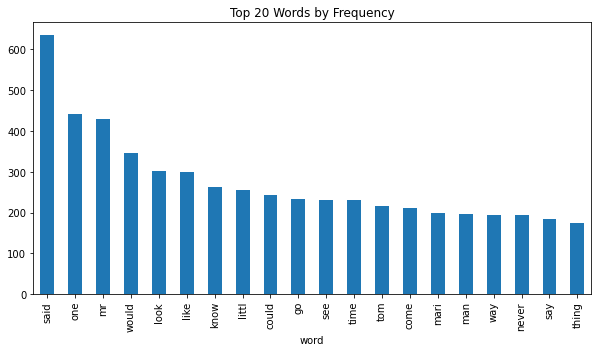

In [59]:

# Get word frequency counts from the CountVectorizer object
word_freq = count_matrix.toarray().sum(axis=0)

# Create a dataframe of words and their frequency
word_df = pd.DataFrame({'word': feature_names_bow, 'freq': word_freq})
word_df.sort_values('freq', ascending=False, inplace=True)

# Plot the top n words
n = 20
word_df[:n].plot.bar(x='word', y='freq', legend=False, figsize=(10,5))
plt.title('Top {} Words by Frequency'.format(n))
plt.show()

# Split train and test set

In [28]:
df

,partition,label
0,"['project', 'gutenberg', 'ebook', 'peter', 'pa...",a
1,"['peter', 'pan', 'peter', 'pan', 'wendi', 'aut...",a
2,"['digit', 'copyright', 'claim', 'consist', 'cu...",a
3,"['stori', 'chapter', 'xii', 'child', 'carri', ...",a
4,"['ran', 'mother', 'suppos', 'must', 'look', 'r...",a
...,...,...
1395,"['meantim', 'Mr', 'merryweath', 'must', 'put',...",g
1396,"['though', 'shall', 'take', 'disadvantag', 'ma...",g
1397,"['absolut', 'dark', 'never', 'experienc', 'sme...",g
1398,"['ask', 'jone', 'inspector', 'two', 'offic', '...",g


In [29]:
from sklearn.model_selection import train_test_split
x = df['partition']
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Cross validation -- Confusion Matrix and accuracy

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import cross_val_score,  cross_val_predict, StratifiedKFold

def analysis(pipeline, data, label, x_train, x_test, y_train, y_test):
    
    #confusion matrix
    pipeline.fit(x_train, y_train)
    pred = pipeline.predict(x_test)
    unique_labels = np.unique(df['label'])
    cf_matrix = confusion_matrix(y_test, pred)
    draw_confusion_matrix(cf_matrix, unique_labels)
    
    #cross validation
    cv = StratifiedKFold(n_splits=10)
    
    y_pred = cross_val_predict(pipeline, data, label, cv=cv)
    accuracy = np.mean(label == y_pred)
    print('Accuracy:' + str(accuracy))

    print (classification_report(label, y_pred))
    

In [31]:
import matplotlib.pyplot as plt
def draw_confusion_matrix(cf_matrix, labels):
    cm_df = pd.DataFrame(cf_matrix, labels, labels)
    plt.figure(figsize=(len(labels),len(labels)))
    sns.heatmap(cf_matrix, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

# Create bow, tfidf and n_gram vectorizer

In [32]:
bow = CountVectorizer(stop_words=sw_nltk)
tfidf = TfidfVectorizer(stop_words=sw_nltk)
n_gram =  CountVectorizer(ngram_range=(2, 2))

vectorizer_dict = {'BOW':bow, 'TF-IDF':tfidf, 'N-gram':n_gram}

# KNN -- find best k with BOW, TFIDF and N-gram

The report for KNN with BOW
The best value k is 14


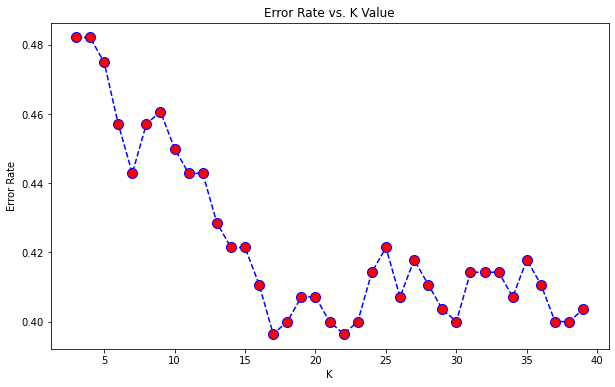

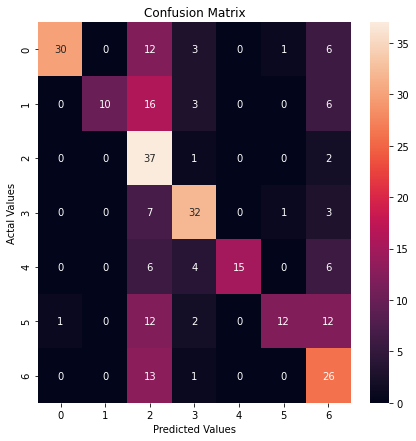

Accuracy:0.5421428571428571
              precision    recall  f1-score   support

           a       0.91      0.54      0.68       200
           b       0.91      0.37      0.53       200
           c       0.31      0.91      0.46       200
           d       0.77      0.69      0.73       200
           e       0.99      0.35      0.52       200
           f       0.88      0.34      0.50       200
           g       0.41      0.59      0.48       200

    accuracy                           0.54      1400
   macro avg       0.74      0.54      0.56      1400
weighted avg       0.74      0.54      0.56      1400



The report for KNN with TF-IDF
The best value k is 9


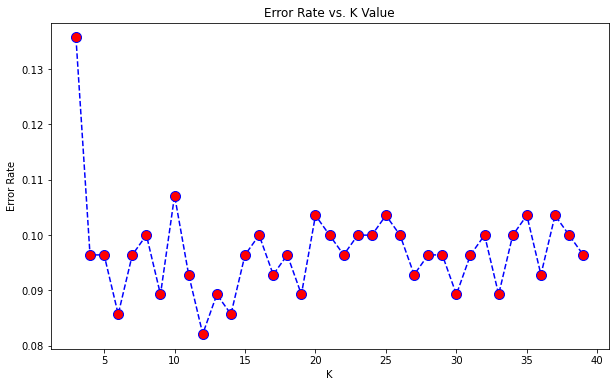

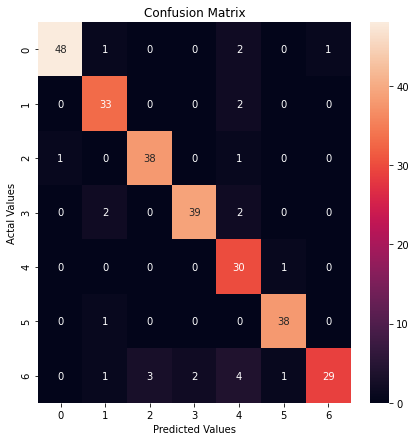

Accuracy:0.8471428571428572
              precision    recall  f1-score   support

           a       0.78      0.92      0.84       200
           b       0.88      0.77      0.82       200
           c       0.83      0.84      0.84       200
           d       0.91      0.85      0.88       200
           e       0.78      0.96      0.86       200
           f       0.86      0.88      0.87       200
           g       0.95      0.71      0.82       200

    accuracy                           0.85      1400
   macro avg       0.86      0.85      0.85      1400
weighted avg       0.86      0.85      0.85      1400



The report for KNN with N-gram
The best value k is 6


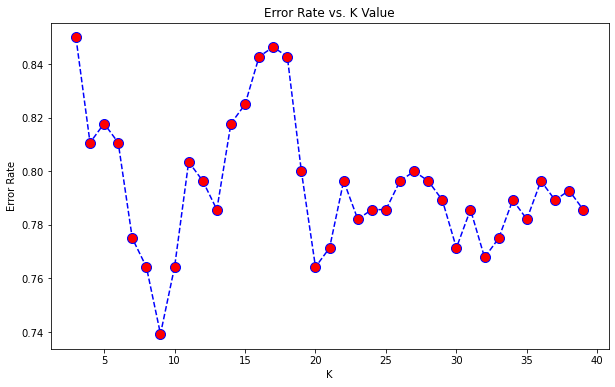

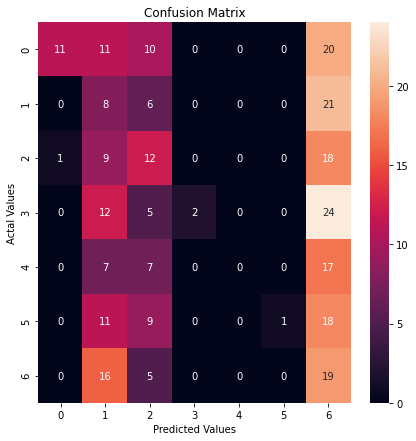

Accuracy:0.1492857142857143
              precision    recall  f1-score   support

           a       1.00      0.04      0.07       200
           b       0.14      0.80      0.24       200
           c       0.15      0.21      0.18       200
           d       0.00      0.00      0.00       200
           e       0.00      0.00      0.00       200
           f       0.00      0.00      0.00       200
           g       0.00      0.00      0.00       200

    accuracy                           0.15      1400
   macro avg       0.19      0.15      0.07      1400
weighted avg       0.19      0.15      0.07      1400





D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier


for key in vectorizer_dict:
    error_rate = []
    for i in range(3,40):
        knn_clf = Pipeline([
            ('trans', vectorizer_dict[key]),
            ('clf', KNeighborsClassifier(n_neighbors=i))
        ])

        knn_clf.fit(x_train, y_train)
        pred = knn_clf.predict(x_test)
        error_rate.append(np.mean(pred != y_test))
    # find the optimal K
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,6))
    plt.plot(range(3,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    
    best_k = error_rate.index(min(error_rate))

    best_knn = Pipeline([
            ('trans', vectorizer_dict[key]),
            ('clf', KNeighborsClassifier(n_neighbors=best_k))
        ])
    print('The report for KNN with ' + key)
    print('The best value k is ' + str(best_k))
    analysis(best_knn, x, y, x_train, x_test, y_train, y_test)
    print('')
    print('')

# XGboots

In [73]:
import sys
!{sys.executable} -m pip install xgboost

The report for XGboots with BOW


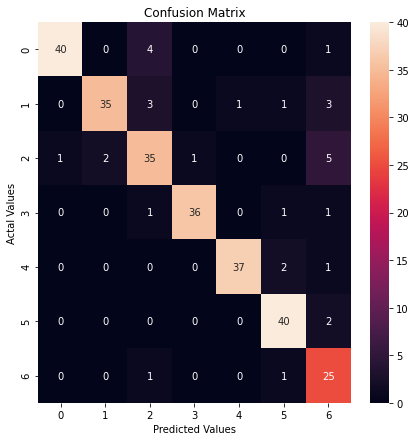

Accuracy:0.8292857142857143
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       200
           1       0.75      0.76      0.75       200
           2       0.74      0.78      0.76       200
           3       0.91      0.84      0.87       200
           4       0.88      0.92      0.90       200
           5       0.92      0.87      0.89       200
           6       0.71      0.80      0.75       200

    accuracy                           0.83      1400
   macro avg       0.83      0.83      0.83      1400
weighted avg       0.83      0.83      0.83      1400



The report for XGboots with TF-IDF


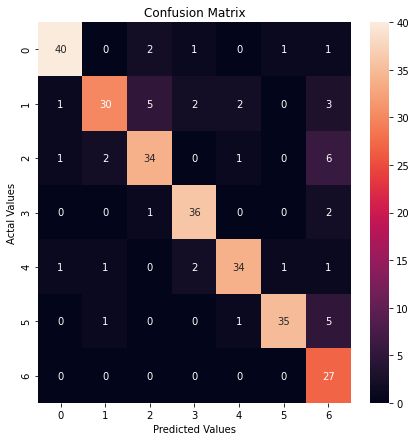

Accuracy:0.8142857142857143
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       200
           1       0.79      0.72      0.75       200
           2       0.71      0.77      0.73       200
           3       0.89      0.84      0.87       200
           4       0.87      0.91      0.89       200
           5       0.92      0.84      0.88       200
           6       0.66      0.79      0.72       200

    accuracy                           0.81      1400
   macro avg       0.82      0.81      0.82      1400
weighted avg       0.82      0.81      0.82      1400



The report for XGboots with N-gram


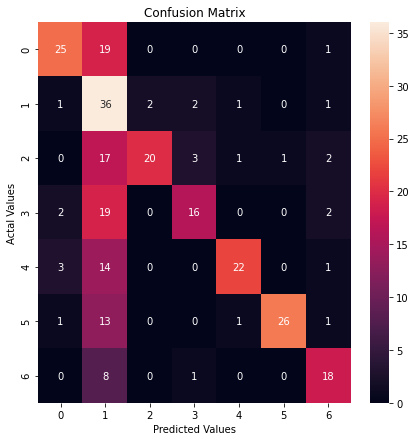

Accuracy:0.5764285714285714
              precision    recall  f1-score   support

           0       0.81      0.51      0.62       200
           1       0.27      0.88      0.42       200
           2       0.83      0.46      0.59       200
           3       0.76      0.47      0.58       200
           4       0.88      0.63      0.73       200
           5       0.90      0.65      0.75       200
           6       0.80      0.45      0.57       200

    accuracy                           0.58      1400
   macro avg       0.75      0.58      0.61      1400
weighted avg       0.75      0.58      0.61      1400





In [83]:
from sklearn import preprocessing
from xgboost import XGBClassifier

le = preprocessing.LabelEncoder()
y_xg = le.fit_transform(y)
y_train_xg = le.fit_transform(y_train)
y_test_xg = le.fit_transform(y_test)

for key in vectorizer_dict:
    xgboots_cfl = Pipeline([
    ('trans', vectorizer_dict[key]),
    ('clf', XGBClassifier())
    ])
    
    print('The report for XGboots with ' + key)
    analysis(xgboots_cfl, x, y_xg, x_train, x_test, y_train_xg, y_test_xg)
    
    print('')
    print('')

# Decision Tree -- find best value of max_depth

The report for DT with BOW
The best value of max depth is 10


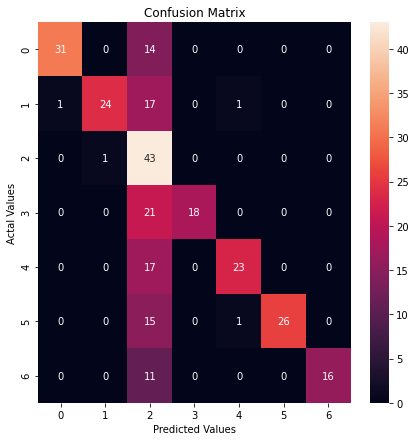

Accuracy:0.5964285714285714
              precision    recall  f1-score   support

           a       0.98      0.64      0.77       200
           b       0.91      0.55      0.68       200
           c       0.27      0.97      0.42       200
           d       0.98      0.60      0.75       200
           e       0.88      0.61      0.72       200
           f       0.95      0.41      0.57       200
           g       1.00      0.41      0.58       200

    accuracy                           0.60      1400
   macro avg       0.85      0.60      0.64      1400
weighted avg       0.85      0.60      0.64      1400



The report for DT with TF-IDF
The best value of max depth is 10


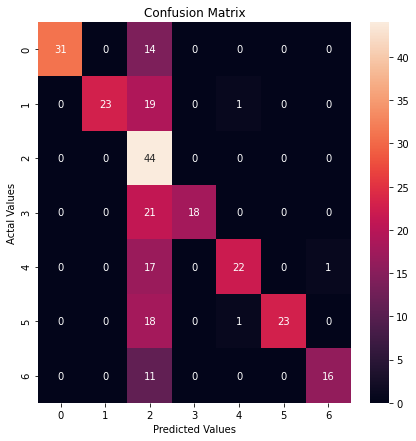

Accuracy:0.59
              precision    recall  f1-score   support

           a       0.98      0.64      0.78       200
           b       0.90      0.55      0.68       200
           c       0.27      0.97      0.42       200
           d       0.99      0.61      0.76       200
           e       0.88      0.60      0.71       200
           f       0.95      0.35      0.51       200
           g       1.00      0.41      0.58       200

    accuracy                           0.59      1400
   macro avg       0.85      0.59      0.63      1400
weighted avg       0.85      0.59      0.63      1400



The report for DT with N-gram
The best value of max depth is 10


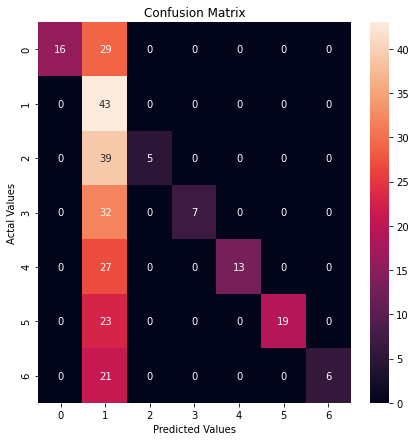

Accuracy:0.3092857142857143
              precision    recall  f1-score   support

           a       1.00      0.24      0.39       200
           b       0.17      1.00      0.29       200
           c       1.00      0.01      0.03       200
           d       1.00      0.14      0.25       200
           e       1.00      0.28      0.43       200
           f       1.00      0.32      0.48       200
           g       1.00      0.17      0.29       200

    accuracy                           0.31      1400
   macro avg       0.88      0.31      0.31      1400
weighted avg       0.88      0.31      0.31      1400





In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

for key in vectorizer_dict:

    dt_clf = Pipeline([('vect', vectorizer_dict[key]),
             ('dt', DecisionTreeClassifier())])


    # Define the hyperparameter search space
    param_grid = {'dt__max_depth': range(1, 11)}

    # Create the grid search object
    grid_search = GridSearchCV(dt_clf, param_grid, cv=5)

    # Fit the grid search to the data
    grid_search.fit(x, y)

    # Get the best hyperparameters
    best_depth = grid_search.best_params_['dt__max_depth']
    
    print('The report for DT with ' + key)
    print('The best value of max depth is ' + str(best_depth))
    
    best_dt = Pipeline([
        ('trans', vectorizer_dict[key]),
        ('clf',  DecisionTreeClassifier(max_depth = best_depth))
        ])

    analysis(best_dt, x, y, x_train, x_test, y_train, y_test)
    
    print('')
    print('')


# SVM.SVC

The report for SVM.SVC with BOW


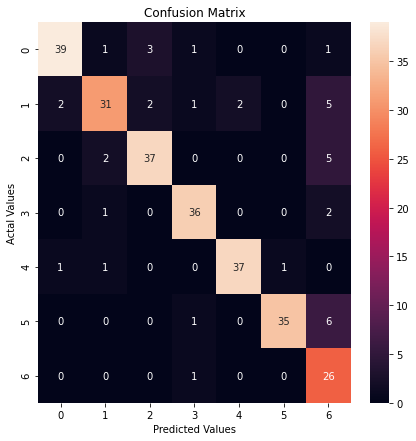

Accuracy:0.8471428571428572
              precision    recall  f1-score   support

           a       0.95      0.81      0.87       200
           b       0.85      0.75      0.80       200
           c       0.74      0.88      0.80       200
           d       0.96      0.83      0.89       200
           e       0.97      0.90      0.93       200
           f       0.95      0.83      0.89       200
           g       0.66      0.93      0.77       200

    accuracy                           0.85      1400
   macro avg       0.87      0.85      0.85      1400
weighted avg       0.87      0.85      0.85      1400



The report for SVM.SVC with TF-IDF


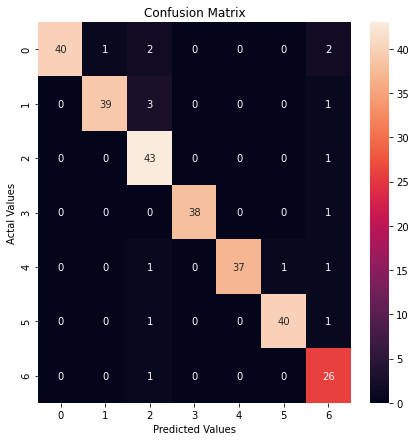

Accuracy:0.9021428571428571
              precision    recall  f1-score   support

           a       0.99      0.82      0.90       200
           b       0.87      0.85      0.86       200
           c       0.80      0.94      0.87       200
           d       0.97      0.89      0.93       200
           e       0.98      0.95      0.97       200
           f       0.95      0.93      0.94       200
           g       0.80      0.93      0.86       200

    accuracy                           0.90      1400
   macro avg       0.91      0.90      0.90      1400
weighted avg       0.91      0.90      0.90      1400



The report for SVM.SVC with N-gram


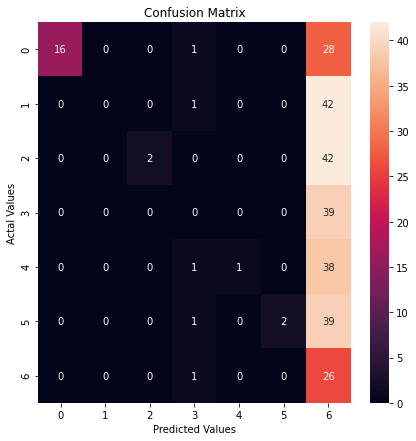

Accuracy:0.2007142857142857
              precision    recall  f1-score   support

           a       1.00      0.23      0.37       200
           b       0.00      0.00      0.00       200
           c       1.00      0.15      0.27       200
           d       1.00      0.01      0.01       200
           e       1.00      0.01      0.02       200
           f       1.00      0.01      0.02       200
           g       0.15      1.00      0.26       200

    accuracy                           0.20      1400
   macro avg       0.74      0.20      0.14      1400
weighted avg       0.74      0.20      0.14      1400





D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
from sklearn import svm

for key in vectorizer_dict:
    svc_cfl = Pipeline([
    ('trans', vectorizer_dict[key]),
    ('clf', svm.SVC())
    ])
    
    print('The report for SVM.SVC with ' + key)
    analysis(svc_cfl, x, y, x_train, x_test, y_train, y_test)
    
    print('')
    print('')

# LinearSVC

The report for LinearSVC with BOW


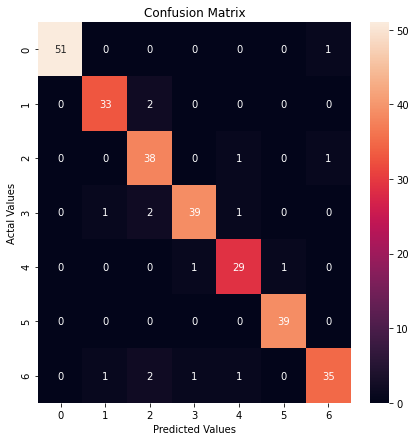

Accuracy:0.8885714285714286
              precision    recall  f1-score   support

           a       0.93      0.90      0.91       200
           b       0.88      0.81      0.84       200
           c       0.81      0.85      0.83       200
           d       0.93      0.90      0.91       200
           e       0.90      0.94      0.92       200
           f       0.94      0.94      0.94       200
           g       0.84      0.88      0.86       200

    accuracy                           0.89      1400
   macro avg       0.89      0.89      0.89      1400
weighted avg       0.89      0.89      0.89      1400



The report for LinearSVC with TF-IDF


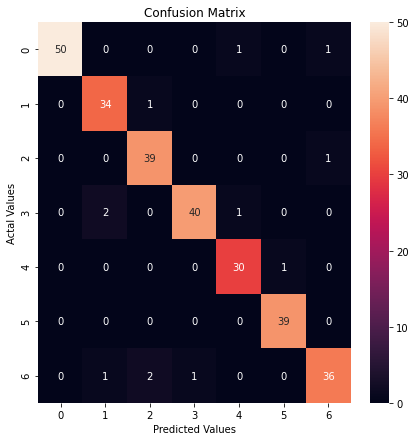

Accuracy:0.915
              precision    recall  f1-score   support

           a       0.95      0.91      0.93       200
           b       0.88      0.84      0.86       200
           c       0.86      0.92      0.89       200
           d       0.94      0.92      0.93       200
           e       0.92      0.98      0.95       200
           f       0.94      0.96      0.95       200
           g       0.91      0.89      0.90       200

    accuracy                           0.92      1400
   macro avg       0.92      0.92      0.91      1400
weighted avg       0.92      0.92      0.91      1400



The report for LinearSVC with N-gram


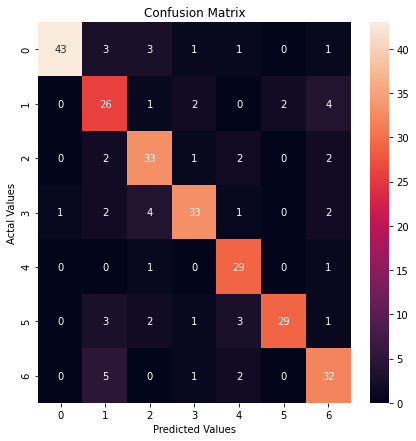

Accuracy:0.75
              precision    recall  f1-score   support

           a       0.83      0.76      0.79       200
           b       0.58      0.69      0.63       200
           c       0.72      0.76      0.74       200
           d       0.73      0.70      0.72       200
           e       0.86      0.85      0.86       200
           f       0.95      0.73      0.82       200
           g       0.67      0.76      0.71       200

    accuracy                           0.75      1400
   macro avg       0.76      0.75      0.75      1400
weighted avg       0.76      0.75      0.75      1400





In [34]:
from sklearn.svm import LinearSVC

for key in vectorizer_dict:
    linearsvc_cfl = Pipeline([
    ('trans', vectorizer_dict[key]),
    ('clf', LinearSVC())
    ])
    
    print('The report for LinearSVC with ' + key)
    analysis(linearsvc_cfl, x, y, x_train, x_test, y_train, y_test)
    
    print('')
    print('')

# SGD

The report for SGD with BOW


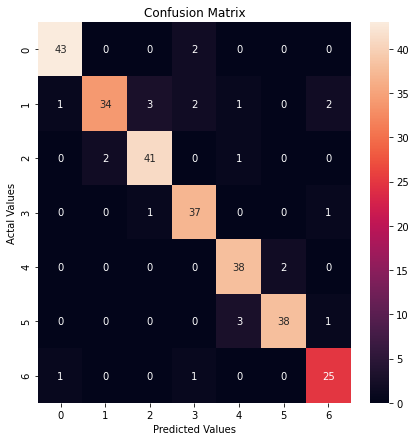

Accuracy:0.8371428571428572
              precision    recall  f1-score   support

           a       0.89      0.86      0.88       200
           b       0.79      0.74      0.76       200
           c       0.76      0.76      0.76       200
           d       0.88      0.87      0.88       200
           e       0.88      0.92      0.90       200
           f       0.84      0.91      0.87       200
           g       0.81      0.80      0.80       200

    accuracy                           0.84      1400
   macro avg       0.84      0.84      0.84      1400
weighted avg       0.84      0.84      0.84      1400



The report for SGD with TF-IDF


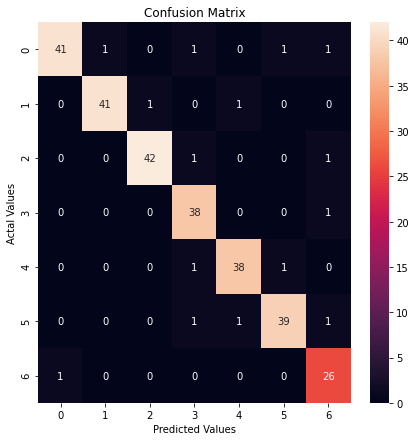

Accuracy:0.9114285714285715
              precision    recall  f1-score   support

           a       0.95      0.91      0.93       200
           b       0.87      0.83      0.85       200
           c       0.86      0.92      0.89       200
           d       0.95      0.91      0.93       200
           e       0.92      0.97      0.95       200
           f       0.94      0.96      0.95       200
           g       0.90      0.87      0.89       200

    accuracy                           0.91      1400
   macro avg       0.91      0.91      0.91      1400
weighted avg       0.91      0.91      0.91      1400



The report for SGD with N-gram


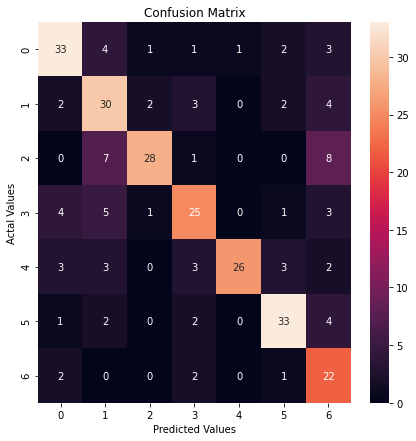

Accuracy:0.7035714285714286
              precision    recall  f1-score   support

           a       0.82      0.69      0.75       200
           b       0.54      0.69      0.61       200
           c       0.79      0.63      0.70       200
           d       0.63      0.69      0.66       200
           e       0.91      0.76      0.83       200
           f       0.69      0.78      0.73       200
           g       0.67      0.69      0.68       200

    accuracy                           0.70      1400
   macro avg       0.72      0.70      0.71      1400
weighted avg       0.72      0.70      0.71      1400





In [87]:
from sklearn.linear_model import SGDClassifier

for key in vectorizer_dict:
    linearsvc_cfl = Pipeline([
    ('trans', vectorizer_dict[key]),
    ('clf', SGDClassifier())
    ])
    
    print('The report for SGD with ' + key)
    analysis(linearsvc_cfl, x, y, x_train, x_test, y_train, y_test)
    
    print('')
    print('')

# Best Model tf-idf * LinearSVC

In [35]:
best_model = Pipeline([
    ('trans', TfidfVectorizer(stop_words=sw_nltk)),
    ('clf', LinearSVC())
    ])



In [36]:
def test(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    accuracy = np.mean(pred == y_test)

    print("accuracy: " + str(accuracy))

    unique_labels = np.unique(df['label'])
    cf_matrix = confusion_matrix(y_test, pred)
    draw_confusion_matrix(cf_matrix, unique_labels)
    print (classification_report(y_test, pred))

The performance of the best model on test set:
accuracy: 0.9571428571428572


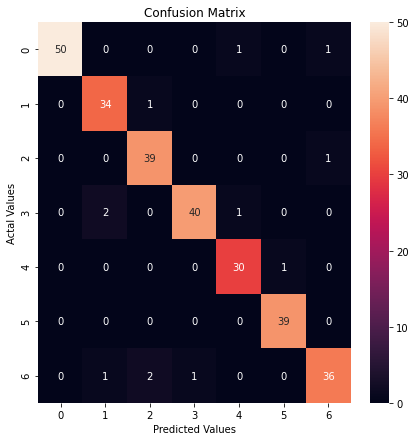

              precision    recall  f1-score   support

           a       1.00      0.96      0.98        52
           b       0.92      0.97      0.94        35
           c       0.93      0.97      0.95        40
           d       0.98      0.93      0.95        43
           e       0.94      0.97      0.95        31
           f       0.97      1.00      0.99        39
           g       0.95      0.90      0.92        40

    accuracy                           0.96       280
   macro avg       0.95      0.96      0.96       280
weighted avg       0.96      0.96      0.96       280



In [37]:
print('The performance of the best model on test set:')
test(best_model,  x_train, y_train, x_test, y_test)

# Error Analysis -- Display wrong prediction

In [110]:
def display_error(model, return_error=False):

    y_pred = model.predict(x_test)
    compare_dict = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
    errors = compare_dict.loc[(compare_dict['Predicted'] != compare_dict['Actual'])]
    idx = errors.index.values.tolist()
    error_words = []
    for i in idx:
        error_words.append(x_test[i])

    trans = CountVectorizer(stop_words=sw_nltk)
    count = trans.fit_transform(error_words)
    feature =  trans.get_feature_names_out()
    freq = count.toarray().sum(axis=0)
    error_df = pd.DataFrame({'word': feature, 'freq': freq})
    error_df.sort_values('freq', ascending=False, inplace=True)

    # Plot the top n words
    n = 20
    error_df[:n].plot.bar(x='word', y='freq', legend=False, figsize=(10,5))
    plt.title('Top {} Error Words by Frequency'.format(n))
    plt.show()
    
    if return_error == True:
        return error_df

In [104]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [114]:
from wordcloud import WordCloud

def show_wordcloud(word_freq):
    wordcloud = WordCloud(width=800, height=400, max_font_size=110).generate_from_frequencies(dict(zip(word_freq.word, word_freq.freq)))

    # Plot the wordcloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    

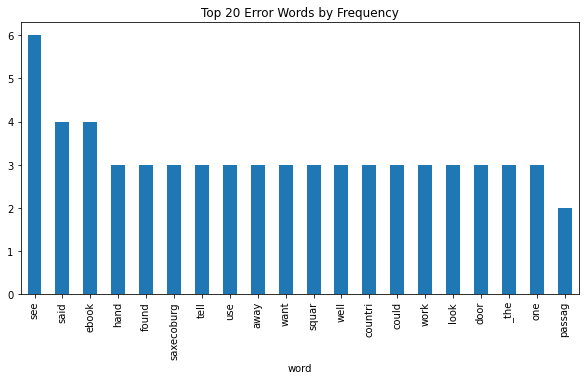

,word,freq
293,see,6
286,said,4
91,ebook,4
147,hand,3
125,found,3
...,...,...
131,front,1
130,french,1
129,freemasonri,1
128,frederick,1


In [111]:
error_df = display_error(best_model, return_error=True)
error_df


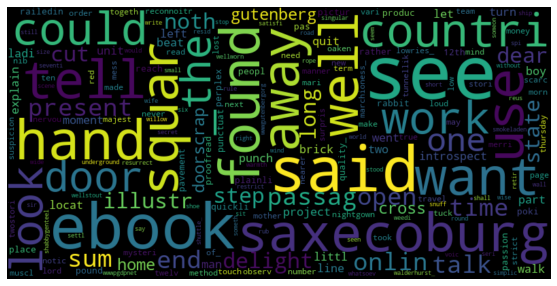

In [115]:
show_wordcloud(error_df)

# Error Analysis -- Bias and Viarence

## 1. Data

### For our best model. If we use the unbanlenced data, we will get different results

### a) Change the train test split ratio

In [60]:
def set_diff_scale(df, ratio):

  x_train_diff_scale, x_test_diff_scale, y_train_diff_scale, y_test_diff_scale = train_test_split(x, y, train_size=ratio) 
  return x_train_diff_scale, x_test_diff_scale, y_train_diff_scale, y_test_diff_scale


In [61]:
def run_diff_scale(ratio_list):
  scores_train = []
  scores_test = []
  for ratio in ratio_list:
    x_train_diff_scale, x_test_diff_scale, y_train_diff_scale, y_test_diff_scale = set_diff_scale(df, ratio)

    best_model.fit(x_train_diff_scale, y_train_diff_scale)
    cross_val = cross_val_score(best_model, x_train_diff_scale, y_train_diff_scale, cv=10, scoring='accuracy')
    accuracy_train = np.mean(cross_val)
    scores_train.append(accuracy_train)

    pred_test = best_model.predict(x_test_diff_scale)
    accuracy_test = np.mean(pred_test == y_test_diff_scale)
    scores_test.append(accuracy_test)
  
  return scores_train, scores_test

In [62]:
# Compare the performance of linear SVC with tfidf model under diffrent sample scale
ratio_list = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
scores_train_diff_scale, scores_test_diff_scale = run_diff_scale(ratio_list)

[0.9107142857142858, 0.9190476190476191, 0.9267857142857142, 0.9457142857142857, 0.9404761904761904, 0.9469072164948453, 0.9571428571428571, 0.9539682539682539]
[0.89375, 0.8948979591836734, 0.9285714285714286, 0.9471428571428572, 0.9446428571428571, 0.9453681710213777, 0.9642857142857143, 0.9642857142857143]


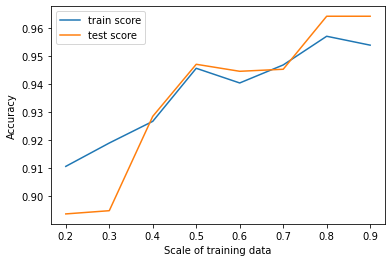

In [63]:
print(scores_train_diff_scale)
print(scores_test_diff_scale)
plt.plot(ratio_list,scores_train_diff_scale, label = "train score")
plt.plot(ratio_list,scores_test_diff_scale, label = "test score")
plt.xlabel('Scale of training data')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We can clearly see that, when the training data set is getting smaller, the accuracy scores of the model get lower both on training data and testing data. However, the overall performance of the data is still very good -- the accuracy is more than 0.9. The influence of data scale on the model is not so big as the influence of unbalancing and shorter segment..

###  b) Make the training set and test set unbanlenced.

In [56]:
# create an imbalanced training and testing data set
def set_imb(df_all, char):
  df_train = pd.DataFrame()
  df_test = pd.DataFrame()
  label_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
  for label in label_list:
    if label != char:
      df_train = df_train.append(df[df['label']==label][:180], ignore_index=True)
      df_test = df_test.append(df[df['label']==label][180:], ignore_index=True)
    else:
      df_train = df_train.append(df[df['label']==label][:20], ignore_index=True)
      df_test = df_test.append(df[df['label']==label][20:], ignore_index=True)

  x_train_imb, y_train_imb, x_test_imb, y_test_imb = df_train['partition'], df_train['label'], df_test['partition'], df_test['label']

  return x_train_imb, y_train_imb, x_test_imb, y_test_imb

In [57]:
def run_imb(char_list):
  scores_train = []
  scores_test = []
  for char in char_list:
    x_train_imb, y_train_imb, x_test_imb, y_test_imb = set_imb(df, char)
    best_model.fit(x_train_imb, y_train_imb)

    cross_val = cross_val_score(best_model, x_train_imb, y_train_imb, cv=10, scoring='accuracy')
    accuracy_train = np.mean(cross_val)
    scores_train.append(accuracy_train)

    pred_test_imb = best_model.predict(x_test_imb)
    accuracy_test = np.mean(pred_test_imb == y_test_imb)
    scores_test.append(accuracy_test)

  return scores_train, scores_test

[0.9154545454545454, 0.9363636363636363, 0.9290909090909091, 0.9118181818181817, 0.9109090909090908, 0.9127272727272728, 0.9154545454545454]
[0.7133333333333334, 0.6233333333333333, 0.4633333333333333, 0.6833333333333333, 0.5266666666666666, 0.4666666666666667, 0.52]


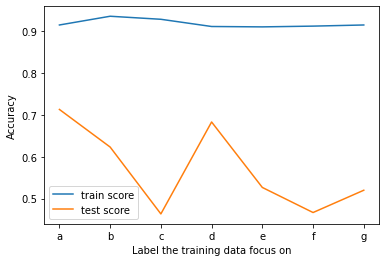

In [58]:
char_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
scores_train_imb, scores_test_imb = run_imb(char_list)
print(scores_train_imb)
print(scores_test_imb)
plt.plot(char_list,scores_train_imb, label = "train score")
plt.plot(char_list,scores_test_imb,  label = "test score")
plt.xlabel('Label the training data focus on')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### The model is over fitting!

An imbalanced training data would cause variance. Since the train data set includes such a big amount of segment with a certain label, the model pays a lot of attention to training data, and get more feature of some certain samples but not with the other labels. As an results, this model does not generalize on the data which it hasn’t seen before. So, such models perform very well on training data but has high error rates on test data.

### c) Reduce the word number of each segment

In [27]:
# Create new training and testing data set with different length of segment
def set_diff_len(x_train, x_test, y_train, y_test, length): 
  x_train_list = []
  for segment in x_train:
    x_train_list.append(segment[:length])
  x_test_list = []
  for segment in x_test:
    x_test_list.append(segment[:length])

  x_train_diff_len = pd.Series(x_train_list)
  x_test_diff_len = pd.Series(x_test_list)

  return x_train_diff_len, x_test_diff_len  

In [28]:
def run_diff_len(length_list):
  scores_train = []
  scores_test = []
  for length in length_list:
    # Genarate the new data set
    x_train_diff_len, x_test_diff_len = set_diff_len(x_train, x_test, y_train, y_test, length) 
    # Train the model with the new data set
    best_model.fit(x_train_diff_len, y_train)
    # We use the mean accuracy of cross validation on training data to measure the performance of model on training data
    cross_val = cross_val_score(best_model, x_train_diff_len, y_train, cv=10, scoring='accuracy')
    accuracy_train = np.mean(cross_val)
    scores_train.append(accuracy_train)
    # Compare with the accuracy on test data
    pred_test = best_model.predict(x_test_diff_len)
    accuracy_test = np.mean(pred_test == y_test)
    scores_test.append(accuracy_test)
  
  return scores_train, scores_test

In [29]:
# We choose 25, 50, ... words of each segment anc compare the performance of the model under diffrent length of segment.
length_list = [25, 50, 75, 100, 125, 150, 200]
scores_train_diff_len, scores_test_diff_len = run_diff_len(length_list)

[0.35714285714285715, 0.5008928571428571, 0.6026785714285714, 0.7008928571428572, 0.7517857142857143, 0.79375, 0.8723214285714287]
[0.32142857142857145, 0.4714285714285714, 0.5678571428571428, 0.65, 0.7071428571428572, 0.7678571428571429, 0.8714285714285714]


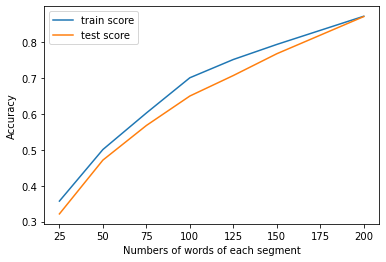

In [30]:
import matplotlib.pyplot as plt
 
print(scores_train_diff_len)
print(scores_test_diff_len)
plt.plot(length_list,scores_train_diff_len, label = "train score")
plt.plot(length_list,scores_test_diff_len,  label = "test score")
plt.xlabel('Numbers of words of each segment')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### The model is under fitting with short segment!

Clearly, we can see that, with a shorter segment, the performance of the model would get worse. Since less feature the model can learn with shorter segment, the bias is increasing. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.

## 2. Feature Engineering.

### Different transformer also can influence the result. In this project, the N-gram transformer didn't perform well and it caused the underfitting. Since the performance on training set and test set is both bad.

### In future, we need find some better hyper parameters to train a better N-gram transformer.

## 3. Classifier

### Different classifier also can influence the result. In this project, we found that the LinerSVC is a better classifier for this case

# Golden data is the most important thing!